In [1]:
import requests
from bs4 import BeautifulSoup
import re
URL = 'https://chineseplus.ru/leksika-dlya-hsk?field_level_hsk_tid=All'
HEADERS = {'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Mobile Safari/537.36 Edg/95.0.1020.40', 'accept': '*/*'}

def get_html(url, params=None):
    r = requests.get(url, headers=HEADERS, params=params)
    return r

def get_pages_count(html):
    soup = BeautifulSoup(html, 'html.parser')
    if(soup.find('li', class_='pager-last')):
        pagination = int(soup.find('li', class_='pager-last').find_next('a').get('href').split('=')[-1])
        return pagination
    else:
        return 1
    
def get_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('td', class_='views-field views-field-title')
    letters = set()
    for item in items:
        word = list(item.get_text(strip=True))
        for letter in word:
            letters.add(letter)
    return letters
        
def parse():
    html = get_html(URL)
    if html.status_code == 200:      
        letters = get_content(html.text)
        pages_count = get_pages_count(html.text)
        for page in range(1, pages_count + 1):
            print(f'Парсинг страницы {page + 1} из {pages_count + 1}...')
            html = get_html(URL, params={'page': page})
            letters.update(get_content(html.text))
        print(f'Получено {len(letters)} иероглифов')
        return letters
    else:
        print('Error')

letters = parse()

Парсинг страницы 2 из 50...
Парсинг страницы 3 из 50...
Парсинг страницы 4 из 50...
Парсинг страницы 5 из 50...
Парсинг страницы 6 из 50...
Парсинг страницы 7 из 50...
Парсинг страницы 8 из 50...
Парсинг страницы 9 из 50...
Парсинг страницы 10 из 50...
Парсинг страницы 11 из 50...
Парсинг страницы 12 из 50...
Парсинг страницы 13 из 50...
Парсинг страницы 14 из 50...
Парсинг страницы 15 из 50...
Парсинг страницы 16 из 50...
Парсинг страницы 17 из 50...
Парсинг страницы 18 из 50...
Парсинг страницы 19 из 50...
Парсинг страницы 20 из 50...
Парсинг страницы 21 из 50...
Парсинг страницы 22 из 50...
Парсинг страницы 23 из 50...
Парсинг страницы 24 из 50...
Парсинг страницы 25 из 50...
Парсинг страницы 26 из 50...
Парсинг страницы 27 из 50...
Парсинг страницы 28 из 50...
Парсинг страницы 29 из 50...
Парсинг страницы 30 из 50...
Парсинг страницы 31 из 50...
Парсинг страницы 32 из 50...
Парсинг страницы 33 из 50...
Парсинг страницы 34 из 50...
Парсинг страницы 35 из 50...
Парсинг страницы 36 из

In [1]:
import codecs
with codecs.open('chinese-word-list.txt', encoding = 'utf-8') as f:
    for line in f:
        line = re.sub("\s+|\n|\r|\d+|", '', line)
        for chin in re.findall(r'[\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF]', line):
            for letter in line:
                letters.add(letter)
f.closed

NameError: name 're' is not defined

In [3]:
letters.pop()

'择'

In [4]:
letters.pop()

'廿'

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
from os.path import isfile, join
import numpy as np
from PIL import Image, ImageFilter, ImageDraw, ImageFont
import random

In [6]:
path_to_fonts = 'font'
fonts = os.listdir(path_to_fonts)
fonts = fonts[2:]
size = [30,35,40,45]

In [7]:
counter = 3
X_data = []
Y_data = []
#for f in listdir('/root/font'):
  #  print(f)
a = 1
for letter in a*list(letters):
    img = Image.new('RGB', (64, 64), 'white')
    idraw = ImageDraw.Draw(img)

    line = ImageFont.truetype(join(path_to_fonts, random.choice(fonts)), size = random.choice(size), encoding='utf-8')
    idraw.text((5, 5), letter, font = line, fill = 'black')
    X_data.append(np.asarray(img).astype('int8'))
    Y_data.append(letter)
    counter = counter + 1
    if(not counter%1000):
        print(f'Создано картинок {counter} из {a*len(letters)}...')
X_data = np.array(X_data)

Создано картинок 1000 из 8184...
Создано картинок 2000 из 8184...
Создано картинок 3000 из 8184...
Создано картинок 4000 из 8184...
Создано картинок 5000 из 8184...
Создано картинок 6000 из 8184...
Создано картинок 7000 из 8184...
Создано картинок 8000 из 8184...


In [8]:
from tensorflow.keras.models import load_model

model = load_model('resnet50k.hdf5')

In [9]:
from tensorflow.keras.models import Model
model= Model(inputs=model.input, outputs=model.layers[-2].output)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 70, 70, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [10]:
result_vector_embedding = model(X_data)

print(np.shape(result_vector_embedding))

(8184, 2048)


In [11]:
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, BatchNormalization, Dropout

In [31]:
hidden_dim = 1000
batch_size = 66
 
def dropout_and_batch(x):
  return Dropout(0.2)(BatchNormalization()(x))

In [32]:
#энкодер
input_img = Input((2048))
x = Dense(256, activation='relu')(input_img)
x = dropout_and_batch(x)
x = Dense(128, activation='relu')(x)
x = dropout_and_batch(x)
#Вектор z_mean – это МО, а вектор z_log_var – логарифм дисперсий  
z_mean = Dense(hidden_dim)(x)
z_log_var = Dense(hidden_dim)(x)

In [33]:
def noiser(args):
  global z_mean, z_log_var
  z_mean, z_log_var = args
  N = K.random_normal(shape=(batch_size, hidden_dim), mean=0., stddev=1.0)
  return K.exp(z_log_var / 2) * N + z_mean

In [34]:
h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean, z_log_var])

In [35]:
input_dec = Input(shape=(hidden_dim,))
d = Dense(128, activation='relu')(input_dec)
d = dropout_and_batch(d)
d = Dense(256, activation='relu')(input_dec)
d = dropout_and_batch(d)
decoded = Dense(2048, activation='sigmoid')(d)

In [36]:
encoder = Model(input_img, h, name='encoder')
decoder = Model(input_dec, decoded, name='decoder')
vae = Model(input_img, decoder(encoder(input_img)), name="vae")
z_meaner = Model(input_img, z_mean, name='Enc_z_mean')
z_lvarer = Model(input_img, z_log_var, name='Enc_z_log_var')

In [37]:
def vae_loss(x, y):
  x = K.reshape(x, shape=(batch_size, 2048))
  y = K.reshape(y, shape=(batch_size, 2048))
  # первый критерий – разница между входным и выходным сигналами
  loss = 2048*binary_crossentropy(x, y)
  #вычисление второго критерия – расстояния Кульбака-Лейблера по тензорам z_mean и z_log_var.  
  kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
  return (loss + kl_loss)/2/2048

In [19]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize(result_vector_embedding)

In [38]:
vae.compile(optimizer=Adam(lr=0.0001), loss=vae_loss)

In [39]:
vae.fit(normalized_arr, normalized_arr, batch_size=batch_size, epochs=200)

Epoch 1/200
124/124 [==============================] - 3s 21ms/step - loss: 0.3989
Epoch 2/200
124/124 [==============================] - 3s 21ms/step - loss: 0.3686: 0s - 
Epoch 3/200
124/124 [==============================] - 3s 21ms/step - loss: 0.3416
Epoch 4/200
124/124 [==============================] - 3s 21ms/step - loss: 0.2992
Epoch 5/200
124/124 [==============================] - 3s 21ms/step - loss: 0.2429
Epoch 6/200
124/124 [==============================] - 3s 21ms/step - loss: 0.1845
Epoch 7/200
124/124 [==============================] - 3s 22ms/step - loss: 0.1385
Epoch 8/200
124/124 [==============================] - 3s 23ms/step - loss: 0.1065
Epoch 9/200
124/124 [==============================] - 3s 20ms/step - loss: 0.0852
Epoch 10/200
124/124 [==============================] - 3s 22ms/step - loss: 0.0714
Epoch 11/200
124/124 [==============================] - 3s 21ms/step - loss: 0.0620
Epoch 12/200
124/124 [==============================] - 3s 20ms/step - loss: 0

KeyboardInterrupt: 

In [40]:
X_encode = z_meaner.predict(normalized_arr, batch_size=batch_size)

Text(0.5, 1.0, 'images projection')

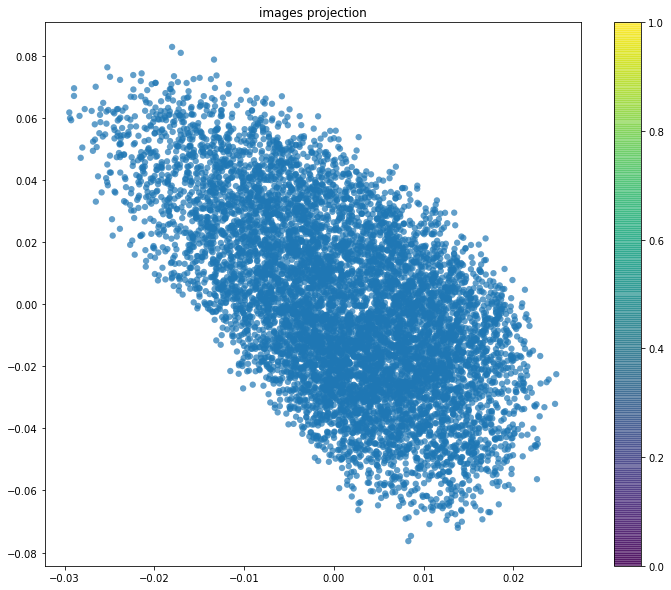

In [41]:
data = X_encode[:, :2]

plt.figure(figsize=(12,10))
plt.scatter(data[:, 0], data[:, 1], edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('images projection')

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)

p_field = tsne.fit_transform(X_encode)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8184 samples in 0.021s...
[t-SNE] Computed neighbors for 8184 samples in 5.545s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8184
[t-SNE] Computed conditional probabilities for sample 2000 / 8184
[t-SNE] Computed conditional probabilities for sample 3000 / 8184
[t-SNE] Computed conditional probabilities for sample 4000 / 8184
[t-SNE] Computed conditional probabilities for sample 5000 / 8184
[t-SNE] Computed conditional probabilities for sample 6000 / 8184
[t-SNE] Computed conditional probabilities for sample 7000 / 8184
[t-SNE] Computed conditional probabilities for sample 8000 / 8184
[t-SNE] Computed conditional probabilities for sample 8184 / 8184
[t-SNE] Mean sigma: 0.033711
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.781891
[t-SNE] KL divergence after 1000 iterations: 0.725229


Text(0.5, 1.0, 'images projection')

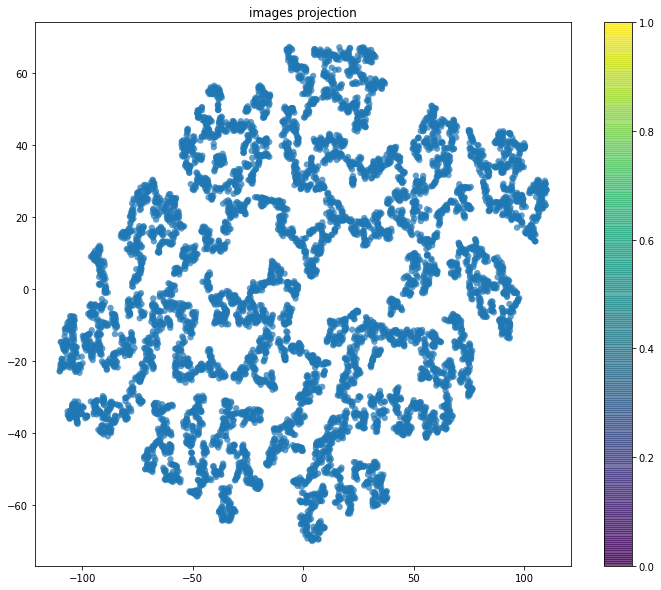

In [43]:
#Convolutional VAE version 2 latent dimention 16 on 305 epoch
data = p_field

plt.figure(figsize=(12,10))
plt.scatter(data[:, 0], data[:, 1], edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('images projection')

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=500, random_state=1, n_jobs=4).fit(X_encode)

C:\Users\iispo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [45]:
np.sqrt(kmeans.inertia_)

2.8351471275084017

In [64]:
Y_data = np.array(Y_data)
pred_classes = kmeans.predict(X_encode)
print('cluster: ', 1)
print(Y_data[np.where(pred_classes == 2)])

cluster:  1
['闲' '唦' '叧' '离' '皞' '茑' '恍' '墀' '肩' '墉' '厅']


In [49]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)

In [50]:
counter = 0
X_data = []
Y_data = []
#for f in listdir('/root/font'):
  #  print(f)
a = 18
for letter in a*list(letters):
    img = Image.new('RGB', (64, 64), 'white')
    idraw = ImageDraw.Draw(img)

    line = ImageFont.truetype(join(path_to_fonts, random.choice(fonts)), size = random.choice(size), encoding='utf-8')
    idraw.text((5, 5), letter, font = line, fill = 'black')
    X_data.append(np.asarray(img).astype('int8'))
    Y_data.append(letter)
    counter = counter + 1
    if(not counter%1000):
        print(f'Создано картинок {counter} из {a*len(letters)}...')
X_data = np.array(X_data)

Создано картинок 1000 из 147312...
Создано картинок 2000 из 147312...
Создано картинок 3000 из 147312...
Создано картинок 4000 из 147312...
Создано картинок 5000 из 147312...
Создано картинок 6000 из 147312...
Создано картинок 7000 из 147312...
Создано картинок 8000 из 147312...
Создано картинок 9000 из 147312...
Создано картинок 10000 из 147312...
Создано картинок 11000 из 147312...
Создано картинок 12000 из 147312...
Создано картинок 13000 из 147312...
Создано картинок 14000 из 147312...
Создано картинок 15000 из 147312...
Создано картинок 16000 из 147312...
Создано картинок 17000 из 147312...
Создано картинок 18000 из 147312...
Создано картинок 19000 из 147312...
Создано картинок 20000 из 147312...
Создано картинок 21000 из 147312...
Создано картинок 22000 из 147312...
Создано картинок 23000 из 147312...
Создано картинок 24000 из 147312...
Создано картинок 25000 из 147312...
Создано картинок 26000 из 147312...
Создано картинок 27000 из 147312...
Создано картинок 28000 из 147312...
С

In [71]:
pred_classes = list(pred_classes) * 18

In [52]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(pred_classes)

Y_classes = tf.keras.utils.to_categorical(np.array(vec),  dtype='int8')
print(np.shape(Y_classes))
print(np.shape(X_data))

(147312, 500)
(147312, 64, 64, 3)


In [53]:
MobileNet = tf.keras.applications.MobileNet(input_shape=(64, 64, 3), weights=None, classes=500, classifier_activation="softmax")

In [54]:
MobileNet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint 
filepath_to_raw_model="content/MobileNet2.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath_to_raw_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

callbacks_lists = [checkpoint]

In [58]:
MobileNet.fit(X_data, Y_classes, epochs = 100, batch_size = 32,validation_split = 0.1, callbacks=callbacks_lists,)

Epoch 1/100
4144/4144 [==============================] - ETA: 0s - loss: 0.2903 - accuracy: 0.9408
Epoch 00001: val_loss improved from 0.45874 to 0.25671, saving model to content\MobileNet2.hdf5
4144/4144 [==============================] - 2767s 668ms/step - loss: 0.2903 - accuracy: 0.9408 - val_loss: 0.2567 - val_accuracy: 0.9371
Epoch 2/100
4144/4144 [==============================] - ETA: 0s - loss: 0.2192 - accuracy: 0.9573
Epoch 00002: val_loss improved from 0.25671 to 0.21696, saving model to content\MobileNet2.hdf5
4144/4144 [==============================] - 2796s 675ms/step - loss: 0.2192 - accuracy: 0.9573 - val_loss: 0.2170 - val_accuracy: 0.9438
Epoch 3/100
4144/4144 [==============================] - ETA: 0s - loss: 0.1641 - accuracy: 0.9699
Epoch 00003: val_loss improved from 0.21696 to 0.16768, saving model to content\MobileNet2.hdf5
4144/4144 [==============================] - 2782s 671ms/step - loss: 0.1641 - accuracy: 0.9699 - val_loss: 0.1677 - val_accuracy: 0.9585
E

KeyboardInterrupt: 